In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import imageio.v3
import time
import cv2
import csv
from numpy import linalg 
from PIL import Image 
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import imageio.v3 as iio
from skimage import filters
#from skimage.color import rgb2gray          
from skimage.measure import regionprops
#from skimage.transform import rescale, resize, downscale_local_mean

# 0. Check the Dataset Order

In [4]:
import os
import re

def check_sequence(folder_path):
    # Liste der Dateien im Ordner abrufen und nach Namen sortieren
    files = sorted(os.listdir(folder_path))

    # Regex, um die Bilddateien mit dem Format *_x.png zu finden
    pattern = re.compile(r'(.+)_([0-9])\.png')

    # Überprüfen der Reihenfolge
    expected_indices = [0, 1, 1]
    expected_index_pos = 0

    for file in files:
        match = pattern.match(file)
        if match:
            current_index = int(match.group(2))

            # Wenn der aktuelle Index nicht dem erwarteten Index entspricht, Fehler melden
            if current_index != expected_indices[expected_index_pos]:
                print(f"Error: {file} is out of sequence. Expected index: {expected_indices[expected_index_pos]}")
                return False

            # Nächsten erwarteten Index berechnen
            expected_index_pos = (expected_index_pos + 1) % len(expected_indices)

    print("All files are in the correct sequence.")
    return True

# Pfad zum Ordner mit den Bildern
folder_path = r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\check'

# Überprüfen der Reihenfolge der Bilder
check_sequence(folder_path)


All files are in the correct sequence.


True

# 0. index hinzufügen

Phasemasks

In [26]:
import os
import shutil
import re

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('(\d+)', s)]

input_folder = r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\Evaluation_2\phasemask_prediction'
output_folder = r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\Evaluation_2\phasemask_prediction_index'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

try:
    files = [file for file in os.listdir(input_folder) if file.lower().endswith('.png')]
    sorted_files = sorted(files, key=natural_sort_key)

    for idx, filename in enumerate(sorted_files, start=13765):
        new_filename = f"{idx}_idx_{filename}"
        input_img_path = os.path.join(input_folder, filename)
        output_img_path = os.path.join(output_folder, new_filename)
        
        shutil.copy2(input_img_path, output_img_path)
        

    print("Completed transferring images with indexed filenames.")
except Exception as e:
    print(f"An error occurred: {e}")



Completed transferring images with indexed filenames.


NF/FF

In [23]:
import os
import shutil

input_folder = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\phasemask_unwrapped_prediction'
output_folder = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\phasemask_unwrapped_prediction_index'



os.makedirs(output_folder, exist_ok=True)

files = os.listdir(input_folder)  
files.sort()  # Thats extrem important windows is strange

for idx, filename in enumerate(files, start=1):
    if filename.lower().endswith('.png'):
        new_filename = f"{idx}_idx_{filename}"
        input_img_path = os.path.join(input_folder, filename)
        output_img_path = os.path.join(output_folder, new_filename)
        
        shutil.copy2(input_img_path, output_img_path)
        #print(f"Copied '{input_img_path}' to '{output_img_path}'")

print("Completed transferring images with indexed filenames.")



Completed transferring images with indexed filenames.


Delte all indexes where i don't have nff and ff.

In [5]:
import os
from concurrent.futures import ThreadPoolExecutor

ordner1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Gaussian_Abb08\camera_1_total_index'
ordner2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Gaussian_Abb08\camera_2_total_index'
ordner3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Gaussian_Abb08\phasemask_total_index_crop'

# Listen der Dateien in jedem Ordner erstellen
dateien_ordner1 = set(os.listdir(ordner1))
dateien_ordner2 = set(os.listdir(ordner2))
dateien_ordner3 = set(os.listdir(ordner3))

def loesche_dateien(index):
    dateiname = f"{index}_idx_"

    pfad1 = next((os.path.join(ordner1, f) for f in dateien_ordner1 if f.startswith(dateiname)), None)
    pfad2 = next((os.path.join(ordner2, f) for f in dateien_ordner2 if f.startswith(dateiname)), None)
    pfad3 = next((os.path.join(ordner3, f) for f in dateien_ordner3 if f.startswith(dateiname)), None)
    
    if not (pfad1 and pfad2 and pfad3):
        if pfad1:
            os.remove(pfad1)
            #print(f"Gelöscht: {pfad1}")
        if pfad2:
            os.remove(pfad2)
            #print(f"Gelöscht: {pfad2}")
        if pfad3:
            os.remove(pfad3)
            #print(f"Gelöscht: {pfad3}")

def main():
    n = 25000  # Anzahl der Indizes

    with ThreadPoolExecutor() as executor:
        executor.map(loesche_dateien, range(1, n + 1))

if __name__ == "__main__":
    main()


# 1. Phasemasks Crop

In [24]:
from methods import crop_around_center

origin = r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\phase_unwrapped_index'
target = r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\phase_unwrapped_index_crop'

for filename in os.listdir(origin):
    if filename.lower().endswith(('.png')):
        
        image_path = os.path.join(origin, filename)
        save_path = os.path.join(target, filename)
        
        try:
            crop_around_center(image_path, save_path)
        except Exception as e:
            print(f"Error processing image {filename}: {e}")

# 2. FF / NF Preprocessing

## 2.1 Cleaning the overexposure images

In [9]:
from PIL import Image
import numpy as np

def oversaturation(image_path, pixel_count_threshold=50): #Analyse a few oversaturated images.
    img = Image.open(image_path)
    img_array = np.array(img)
    oversaturated_pixels = np.sum(img_array == 255)
    return oversaturated_pixels > pixel_count_threshold

def delete_oversaturated_images(folder_path, pixel_count_threshold=10):
    files = os.listdir(folder_path)
    for filename in files:
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            image_path = os.path.join(folder_path, filename)
            if oversaturation(image_path, pixel_count_threshold):
                os.remove(image_path)
                #print(f"Deleted oversaturated image: {filename}")

In [10]:
# Beispielaufruf:
input_folder = r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\camera_2_oversaturrated'
delete_oversaturated_images(input_folder)

## 2.2 Noise filtering [Not doing anything at the moment]

#### Noise filtering for one image

In [ ]:
from methods import background_substraction
input_folder = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Ditzingen_Gaussian\Dataset_Ditzingen_no_resize_4000_img\camera_2_v3_4000img_index'
output_folder = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Synthetic_Gaussian_Noise_preprocessed\check.png' # focus

# input_folder = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Ditzingen_Gaussian\camera_1_v3\2024-04-04 14-02-06.png'
# output_folder = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Synthetic_Gaussian_Noise_preprocessed\beam_nf_ditzingen_real_region_size_30.png'

image_without_noise = background_substraction(input_folder)
image_without_noise = image_without_noise.convert('L')
image_without_noise.save(output_folder)

array = np.asarray(image_without_noise)
print(array)
dataframe= pd.DataFrame(array)
dataframe.to_excel(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Synthetic_Gaussian_Noise_preprocessed\check.xlsx')


In [ ]:
# Testing on spesific Image
image_path = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Synthetic_Gaussian_Noise_preprocessed\Synthetic_with_noise_2000img\train\beam_ff\3202.png'
img = Image.open(image_path)
img= img.convert('L')
img_array= np.asarray(img)
dataframe = pd.DataFrame(img_array)
dataframe.to_excel(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Synthetic_Gaussian_Noise_preprocessed\check.xlsx')

#### Noise Filetering

In [12]:
import os
import imageio
from PIL import Image
import numpy as np
from methods import background_substraction

input_folder = r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\camera_2'
output_folder =  r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\camera_2_noise'


for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        input_img_path = os.path.join(input_folder, filename)
        output_img_path = os.path.join(output_folder, filename)
        #print(f'Processing {input_img_path}')

        
        processed_image = background_substraction(input_img_path)
        processed_image = processed_image.convert('L')
        processed_image.save(output_img_path)


## 2.3 Crop around the centre FF/NF

Calculate the Durchmesser of the Defocus Beam

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Vortex\camera_2_v1_index\1_idx_2024-06-14 18-10-02_c2_1.png'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError(f"Bild konnte nicht geladen werden: {image_path}")

_, binary_img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)


contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    

    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    diameter = 2 * radius
    
    print(f"Durchmesser des Laserstrahls: {diameter:.2f} Pixel")

 
    output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.circle(output_img, (int(x), int(y)), int(radius), (0, 255, 0), 2)
    
    
    plt.figure(figsize=(10, 10))
    plt.imshow(output_img, cmap='gray')
    plt.title("Laserstrahl Durchmesser")
    plt.xlabel("Pixel")
    plt.ylabel("Pixel")
    plt.show()
else:
    print("Kein Laserstrahl im Bild gefunden")


Image_sub_background: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


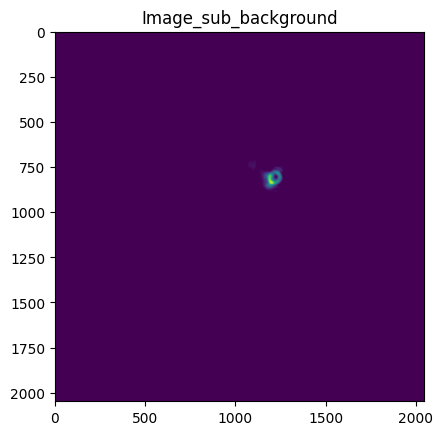

In [2]:
# Ditzingen
# Vortex Reference image
# image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Vortex_Abb08\reference image\vortex_defocus_reference_image.png') # Farfield Camera 2
# image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Vortex_Abb08\reference image\vortex_focus_reference_image.png')

# Vortex v2 because of the new situation collect data again.
#image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Vortex_Abb08_New\reference_image_defocus_vortex.png')
#image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Vortex_Abb08_New\reference_image_focus_vortex.png')

# Gaussian Reference Image
#image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Gaussian_Abb08\gaussian_focus_reference_image.bmp')
#image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datenaufnahme\Raw_Data_Ditzingen_Gaussian_Abb08\gausssian_defocus_reference_image.bmp') #Farfield camera 2


# Evaluation image without abbreaction
# camera 1
#image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Test_1_Gaussian\camera_1_noise\2024-07-10 10-05-09.png')
# camera 2
#image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Test_1_Gaussian\camera_2_noise\2024-07-10 10-05-24.png')


#image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_1\1_idx_2024-08-05 11-07-02_c1_1.png')

# gaussian evaluation reference iamges
#image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian\camera_1_abb\187_idx_2024-08-07 17-40-26_c1_1.png')
#image_sub_background = iio.imread(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Gaussian_2\Reference_Images\camera_2_reference\1_idx_2024-08-07 17-44-02_c2_1.png')

# Schramberg 
# camerfa_1
#image_sub_background = iio.imread(r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\camera_1_noise\1_idx_2024-09-03 16-22-02_c1_1.png')
image_sub_background = iio.imread(r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Schramberg_Datacollection\Schramberg_Datacollection\camera_2_noise\1_idx_2024-09-03 16-22-02_c2_1.png')


#Normalization
img_array = np.asarray(image_sub_background)

#image = img_array / 255.0
print(f"Image_sub_background: {img_array}")
plt.title("Image_sub_background")
plt.imshow(img_array)
plt.show()


Shape: (2048, 2048)
Max_image_sub_background: 149
1
(y,x) (817.5613396432472, 1206.2089552238806)


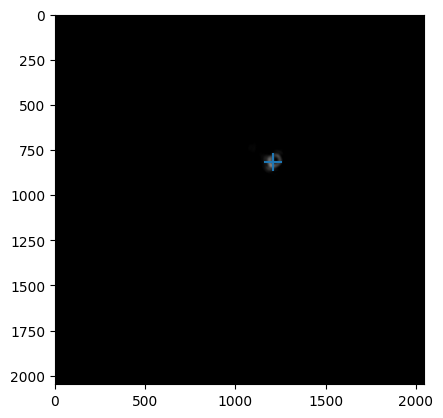

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, color
from skimage.color import label2rgb
from skimage.measure import regionprops
# img_sub_background
print(f"Shape: {image_sub_background.shape}")
print(f"Max_image_sub_background: {np.max(image_sub_background)}")
image = image_sub_background

# If the input image has thgree channels
#image = color.rgb2gray(image_sub_background) 

threshold_value = filters.threshold_otsu(image)
#threshold_value = 0.65 # for gaussian camera 1

# image with only 1 and 0
labeled_foreground = (image > threshold_value).astype(int)
print(np.max(labeled_foreground))
properties = regionprops(labeled_foreground, image)
center_of_mass = properties[0].centroid
weighted_center_of_mass = properties[0].weighted_centroid
print(f"(y,x) {center_of_mass}")


#Plot the image then 3 channels
colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)
fig, ax = plt.subplots()
ax.imshow(colorized)




# Note the inverted coordinates because plt uses (x, y) while NumPy uses (row, column)
ax.scatter(center_of_mass[1], center_of_mass[0], s=160, c='C0', marker='+')
plt.show()



center_of_mask = [1101,1010] # defocus
center_of_mask = [1103,949]

In [10]:
center_of_mass_final=[center_of_mass[0],center_of_mass[1]]

print(center_of_mass_final)

[899.9142857142857, 846.0171428571429]


<class 'numpy.ndarray'>


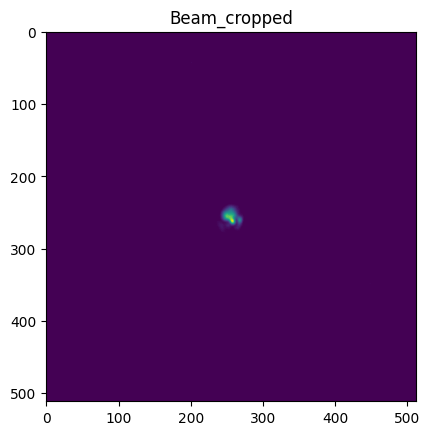

In [11]:
from methods import crop_beam
image_cropped = crop_beam(image,center_of_mass_final, crop_size=512)
print(type(image_cropped))
plt.title("Beam_cropped")
plt.imshow(image_cropped)
plt.show()

Loop for Cropping around the centre

In [12]:
origin = r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Test\camera_1'
target = r'C:\Users\burckhardsv\Lokale_Dateien\Schramberg\Test\camera_1_crop'

for filename in os.listdir(origin):
    if filename.lower().endswith(('.bmp','.png')):
        full_path = os.path.join(origin, filename)
        target_path = os.path.join(target, filename)

        
        if os.path.exists(target_path):
            #print(f"{filename} already exists in the target folder, skipping.")
            continue
        
        
        image = cv2.imread(full_path)
        cropped_image = crop_beam(image,center_of_mass=center_of_mass_final,crop_size=512)
        cv2.imwrite(target_path, cropped_image) 
        print("save")
        
print("All images have been successfully cropped and saved in the target folder.")

save
All images have been successfully cropped and saved in the target folder.
